In [1]:
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa.display
import IPython.display
import soundfile as sf
import os
import errno
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix

C:\Users\ioann\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ioann\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ioann\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ioann\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [2]:
import glob
ravdess_clean_list = glob.glob('clean/Users/ioann/ravdess-speech/*.wav')

In [3]:
def build_ravdess_index(file_list):
    
    emotion_key = {'01': 'neutral', '02': 'calm', '03': 'happy', '04': 'sad', '05': 'angry', '06': 'fearful', '07': 'disgusted', '08': 'surprised'}
    df = { 'emotion': [] }
   

    for file in file_list:
        props = file.split('-')
        
        df['emotion'].append(emotion_key[props[3]])
        

        
       

       

    file_properties = pd.DataFrame(df)
    
    return file_properties

In [4]:
emotion_list = build_ravdess_index(ravdess_clean_list)
labels = pd.DataFrame(emotion_list)

In [5]:
df = pd.DataFrame(columns=['feature'])
bookmark=0



path = '/Users/ioann/ravdess-speech/'




for subdir, dirs, files in os.walk(path):
    for file in files:
      
        #Load librosa array, obtain mfcss, store the file and the mcss information in a new array
        X, sample_rate = librosa.load(os.path.join(subdir,file), res_type='kaiser_fast')
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 
        feature = mfccs
        df.loc[bookmark] = [feature]
        bookmark=bookmark+1

In [11]:
df4 = pd.DataFrame(df['feature'].values.tolist())
newdf = pd.concat([df4,labels], axis=1)
rnewdf = newdf.rename(index=str, columns={"0": "label"})

In [13]:
def build_ravdess_gender(file_list):
    
   
    df = { 'gender': [] }
   

    for file in file_list:
        

        props = file.split('-')
        if int(props[7][:2]) % 2 == 0:
            df['gender'].append('female')
        else:
            df['gender'].append('male')

       

       

    file_properties = pd.DataFrame(df)
    
    return file_properties


In [14]:
gender_list=build_ravdess_gender(ravdess_clean_list)

In [15]:
gender = pd.DataFrame(gender_list)

In [16]:
new = pd.concat([rnewdf,gender], axis=1)

    

In [20]:


newdf = pd.concat([df4,labels,gender], axis=1)
ravdess_gender = newdf.rename(index=str, columns={"0": "label"})

In [22]:
ravdess_gender

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,emotion,gender
0,-700.398878,58.630210,-3.025852,16.040243,4.248529,3.869935,-6.381717,-0.188634,-13.735003,-0.319723,...,-2.042008,-2.522663,-2.507449,-2.250499,-0.381507,-2.481059,-2.791022,-2.244866,neutral,male
1,-653.169017,58.028073,-12.581209,11.818785,-7.681562,-0.617142,-8.337758,-5.823571,-6.547591,1.458057,...,2.558635,3.708506,2.790020,2.201920,-1.021457,0.819200,-0.277811,0.207586,neutral,female
2,-617.052327,60.103365,-5.984258,13.886286,1.120427,0.511750,-14.841357,-4.016369,-5.575839,-6.309851,...,-1.024787,0.331097,0.531833,-1.621018,-2.158077,-2.502774,-0.676132,2.089097,neutral,male
3,-698.721214,47.088487,-11.333611,12.963090,-8.005652,-1.252229,-10.009068,-9.434125,-10.318875,-0.864674,...,-1.408215,0.958173,2.574661,1.877765,1.608618,0.222401,4.338524,4.266795,neutral,female
4,-715.922663,71.976798,4.457525,18.602500,8.404048,3.621956,-1.974365,0.022674,-2.678083,4.232804,...,0.972097,0.210004,0.667769,1.918957,0.174543,-1.768463,-1.512281,-0.253280,neutral,male
5,-739.440873,55.755429,-23.246592,13.280397,-3.838021,-5.957225,-12.653000,-6.214706,-10.689208,3.398455,...,4.206937,5.363243,4.332376,3.667531,1.550318,-0.558750,1.737009,3.253290,neutral,female
6,-653.982540,77.230163,1.074312,23.132712,5.029030,2.561855,-10.727559,-3.295055,-1.869739,-0.463441,...,-1.683185,-1.358684,-2.281433,-3.152291,-5.220386,-3.469335,-1.696725,-0.342364,neutral,male
7,-692.393582,68.048347,3.857427,26.590947,2.598323,6.667670,1.640871,-4.939541,-1.004390,1.792656,...,2.985039,5.605745,5.896914,5.154771,4.143033,5.628289,4.912781,4.313900,neutral,female
8,-741.353967,96.758128,16.994427,37.401855,17.461665,14.264806,1.034319,9.790047,3.433929,9.897499,...,1.080048,0.077569,1.954016,0.924915,-0.342838,-1.029033,-1.741040,-0.339235,neutral,male
9,-574.430922,56.297725,-3.995249,9.307219,0.660650,0.722855,-10.766332,-3.891049,-7.494775,1.972640,...,5.605457,3.372160,5.965045,2.542946,2.380176,1.891932,1.244445,3.589855,neutral,female


In [28]:
female_df=(ravdess_gender.loc[ravdess_gender['gender'] != 'male'])
male_df=(ravdess_gender.loc[ravdess_gender['gender'] != 'female'])

In [29]:
male_df

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,emotion,gender
0,-700.398878,58.630210,-3.025852,16.040243,4.248529,3.869935,-6.381717,-0.188634,-13.735003,-0.319723,...,-2.042008,-2.522663,-2.507449,-2.250499,-0.381507,-2.481059,-2.791022,-2.244866,neutral,male
2,-617.052327,60.103365,-5.984258,13.886286,1.120427,0.511750,-14.841357,-4.016369,-5.575839,-6.309851,...,-1.024787,0.331097,0.531833,-1.621018,-2.158077,-2.502774,-0.676132,2.089097,neutral,male
4,-715.922663,71.976798,4.457525,18.602500,8.404048,3.621956,-1.974365,0.022674,-2.678083,4.232804,...,0.972097,0.210004,0.667769,1.918957,0.174543,-1.768463,-1.512281,-0.253280,neutral,male
6,-653.982540,77.230163,1.074312,23.132712,5.029030,2.561855,-10.727559,-3.295055,-1.869739,-0.463441,...,-1.683185,-1.358684,-2.281433,-3.152291,-5.220386,-3.469335,-1.696725,-0.342364,neutral,male
8,-741.353967,96.758128,16.994427,37.401855,17.461665,14.264806,1.034319,9.790047,3.433929,9.897499,...,1.080048,0.077569,1.954016,0.924915,-0.342838,-1.029033,-1.741040,-0.339235,neutral,male
10,-734.559104,66.724170,19.973302,24.432135,8.267443,10.193674,3.384751,5.832733,-2.836397,4.247270,...,0.951789,0.409593,-0.970139,-0.998077,-0.801911,-1.194514,-1.572553,-0.679407,neutral,male
12,-737.222784,68.615129,-0.249202,14.366146,6.971780,4.769932,-3.964833,0.740859,-6.925254,3.283133,...,0.222590,0.218809,0.430849,0.554459,-0.558221,-1.556306,-1.882601,-0.562863,neutral,male
14,-638.686598,72.511378,-5.997497,15.943515,7.175803,1.197456,-1.932479,1.161894,-6.393956,1.198193,...,0.349048,-0.381267,-0.498064,0.580211,-0.288043,1.125915,0.291572,0.333098,neutral,male
16,-646.566034,78.240240,5.812849,23.272988,13.461742,11.165088,6.540210,-2.067871,-7.179390,9.426169,...,1.068280,-0.431788,-0.993862,-1.745499,-0.998088,-1.758631,-1.363380,-2.398707,neutral,male
18,-723.215910,80.465438,8.933278,21.701921,4.516072,10.858137,1.185063,0.157663,-8.158168,3.154788,...,-0.517987,1.425363,-0.862558,1.228814,-0.960936,-2.644739,-2.159275,-0.943426,neutral,male


In [44]:
test=male_df
train=female_df

In [45]:
trainfeatures = train.iloc[:, :-2]
trainlabel = train.iloc[:, -2]
testfeatures = test.iloc[:, :-2]
testlabel = test.iloc[:, -2]

In [46]:
testfeatures

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-700.398878,58.630210,-3.025852,16.040243,4.248529,3.869935,-6.381717,-0.188634,-13.735003,-0.319723,...,-1.411359,-2.769772,-2.042008,-2.522663,-2.507449,-2.250499,-0.381507,-2.481059,-2.791022,-2.244866
2,-617.052327,60.103365,-5.984258,13.886286,1.120427,0.511750,-14.841357,-4.016369,-5.575839,-6.309851,...,-1.133367,-2.019846,-1.024787,0.331097,0.531833,-1.621018,-2.158077,-2.502774,-0.676132,2.089097
4,-715.922663,71.976798,4.457525,18.602500,8.404048,3.621956,-1.974365,0.022674,-2.678083,4.232804,...,0.505697,0.424780,0.972097,0.210004,0.667769,1.918957,0.174543,-1.768463,-1.512281,-0.253280
6,-653.982540,77.230163,1.074312,23.132712,5.029030,2.561855,-10.727559,-3.295055,-1.869739,-0.463441,...,-4.285201,-0.391933,-1.683185,-1.358684,-2.281433,-3.152291,-5.220386,-3.469335,-1.696725,-0.342364
8,-741.353967,96.758128,16.994427,37.401855,17.461665,14.264806,1.034319,9.790047,3.433929,9.897499,...,1.575394,2.135275,1.080048,0.077569,1.954016,0.924915,-0.342838,-1.029033,-1.741040,-0.339235
10,-734.559104,66.724170,19.973302,24.432135,8.267443,10.193674,3.384751,5.832733,-2.836397,4.247270,...,0.924266,0.830266,0.951789,0.409593,-0.970139,-0.998077,-0.801911,-1.194514,-1.572553,-0.679407
12,-737.222784,68.615129,-0.249202,14.366146,6.971780,4.769932,-3.964833,0.740859,-6.925254,3.283133,...,0.715441,-2.216875,0.222590,0.218809,0.430849,0.554459,-0.558221,-1.556306,-1.882601,-0.562863
14,-638.686598,72.511378,-5.997497,15.943515,7.175803,1.197456,-1.932479,1.161894,-6.393956,1.198193,...,0.569476,-0.153124,0.349048,-0.381267,-0.498064,0.580211,-0.288043,1.125915,0.291572,0.333098
16,-646.566034,78.240240,5.812849,23.272988,13.461742,11.165088,6.540210,-2.067871,-7.179390,9.426169,...,-0.517587,-0.507614,1.068280,-0.431788,-0.993862,-1.745499,-0.998088,-1.758631,-1.363380,-2.398707
18,-723.215910,80.465438,8.933278,21.701921,4.516072,10.858137,1.185063,0.157663,-8.158168,3.154788,...,2.799036,-0.825371,-0.517987,1.425363,-0.862558,1.228814,-0.960936,-2.644739,-2.159275,-0.943426


In [47]:
X_train=trainfeatures

X_test=testfeatures

from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y_train=trainlabel
y_test=testlabel
y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

In [48]:
x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint


model = Sequential()

model.add(Conv1D(256, 5,padding='same',
                 input_shape=(40,1)))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
#model.add(Conv1D(128, 5,padding='same',))
#model.add(Activation('relu'))
#model.add(Conv1D(128, 5,padding='same',))
#model.add(Activation('relu'))
#model.add(Dropout(0.2))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(8))
model.add(Activation('softmax'))
opt = keras.optimizers.rmsprop(lr=0.00001, decay=1e-6)

In [50]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

In [51]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_5 (Conv1D)            (None, 40, 256)           1536      
_________________________________________________________________
activation_6 (Activation)    (None, 40, 256)           0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 40, 128)           163968    
_________________________________________________________________
activation_7 (Activation)    (None, 40, 128)           0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 40, 128)           0         
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 5, 128)            0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 5, 128)           

In [52]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=700,validation_data=(x_testcnn, y_test))

Train on 720 samples, validate on 720 samples
Epoch 1/700
720/720 [==============================] - 1s 1ms/step - loss: 2.6260 - accuracy: 0.1222 - val_loss: 2.1776 - val_accuracy: 0.1361
Epoch 2/700
720/720 [==============================] - 1s 729us/step - loss: 2.3186 - accuracy: 0.1486 - val_loss: 2.0876 - val_accuracy: 0.1264
Epoch 3/700
720/720 [==============================] - 1s 719us/step - loss: 2.2281 - accuracy: 0.1514 - val_loss: 2.0751 - val_accuracy: 0.1903
Epoch 4/700
720/720 [==============================] - 1s 730us/step - loss: 2.1983 - accuracy: 0.1542 - val_loss: 2.0689 - val_accuracy: 0.1528
Epoch 5/700
720/720 [==============================] - 1s 719us/step - loss: 2.1537 - accuracy: 0.1486 - val_loss: 2.0849 - val_accuracy: 0.1861
Epoch 6/700
720/720 [==============================] - 1s 723us/step - loss: 2.0903 - accuracy: 0.1875 - val_loss: 2.0395 - val_accuracy: 0.1708
Epoch 7/700
720/720 [==============================] - 1s 708us/step - loss: 2.0753 - 

Epoch 57/700
720/720 [==============================] - 1s 774us/step - loss: 1.5430 - accuracy: 0.4292 - val_loss: 2.1318 - val_accuracy: 0.1542
Epoch 58/700
720/720 [==============================] - 1s 726us/step - loss: 1.5339 - accuracy: 0.4236 - val_loss: 2.0561 - val_accuracy: 0.2153
Epoch 59/700
720/720 [==============================] - 1s 698us/step - loss: 1.5306 - accuracy: 0.4417 - val_loss: 2.0095 - val_accuracy: 0.2069
Epoch 60/700
720/720 [==============================] - 1s 705us/step - loss: 1.5305 - accuracy: 0.4556 - val_loss: 2.0697 - val_accuracy: 0.1903
Epoch 61/700
720/720 [==============================] - 1s 698us/step - loss: 1.5364 - accuracy: 0.4514 - val_loss: 2.0116 - val_accuracy: 0.1806
Epoch 62/700
720/720 [==============================] - 1s 708us/step - loss: 1.4941 - accuracy: 0.4597 - val_loss: 2.0552 - val_accuracy: 0.2069
Epoch 63/700
720/720 [==============================] - 1s 700us/step - loss: 1.5187 - accuracy: 0.4597 - val_loss: 2.0346 -

Epoch 113/700
720/720 [==============================] - 1s 755us/step - loss: 1.3179 - accuracy: 0.5236 - val_loss: 2.1027 - val_accuracy: 0.1958
Epoch 114/700
720/720 [==============================] - 1s 704us/step - loss: 1.3039 - accuracy: 0.5431 - val_loss: 2.2148 - val_accuracy: 0.1917
Epoch 115/700
720/720 [==============================] - 1s 713us/step - loss: 1.3050 - accuracy: 0.5319 - val_loss: 2.0800 - val_accuracy: 0.2333
Epoch 116/700
720/720 [==============================] - 1s 708us/step - loss: 1.2984 - accuracy: 0.5389 - val_loss: 2.2155 - val_accuracy: 0.1847
Epoch 117/700
720/720 [==============================] - 1s 726us/step - loss: 1.2960 - accuracy: 0.5569 - val_loss: 2.0940 - val_accuracy: 0.1903
Epoch 118/700
720/720 [==============================] - 1s 747us/step - loss: 1.3019 - accuracy: 0.5403 - val_loss: 2.1097 - val_accuracy: 0.2042
Epoch 119/700
720/720 [==============================] - 1s 760us/step - loss: 1.2974 - accuracy: 0.5444 - val_loss: 2

Epoch 169/700
720/720 [==============================] - 0s 693us/step - loss: 1.1299 - accuracy: 0.6042 - val_loss: 2.1761 - val_accuracy: 0.2236
Epoch 170/700
720/720 [==============================] - 1s 697us/step - loss: 1.1298 - accuracy: 0.5847 - val_loss: 2.1328 - val_accuracy: 0.2292
Epoch 171/700
720/720 [==============================] - 0s 694us/step - loss: 1.1115 - accuracy: 0.6111 - val_loss: 2.1714 - val_accuracy: 0.2194
Epoch 172/700
720/720 [==============================] - 1s 695us/step - loss: 1.1253 - accuracy: 0.6125 - val_loss: 2.1876 - val_accuracy: 0.1986
Epoch 173/700
720/720 [==============================] - 0s 691us/step - loss: 1.1093 - accuracy: 0.6111 - val_loss: 2.0700 - val_accuracy: 0.2111
Epoch 174/700
720/720 [==============================] - 1s 700us/step - loss: 1.1129 - accuracy: 0.6069 - val_loss: 2.1243 - val_accuracy: 0.2250
Epoch 175/700
720/720 [==============================] - 0s 693us/step - loss: 1.1034 - accuracy: 0.6208 - val_loss: 2

Epoch 225/700
720/720 [==============================] - 1s 702us/step - loss: 0.9790 - accuracy: 0.6542 - val_loss: 2.2434 - val_accuracy: 0.2306
Epoch 226/700
720/720 [==============================] - 1s 702us/step - loss: 0.9810 - accuracy: 0.6681 - val_loss: 2.2105 - val_accuracy: 0.2250
Epoch 227/700
720/720 [==============================] - 0s 694us/step - loss: 0.9774 - accuracy: 0.6667 - val_loss: 2.2583 - val_accuracy: 0.2222
Epoch 228/700
720/720 [==============================] - 1s 709us/step - loss: 0.9763 - accuracy: 0.6625 - val_loss: 2.2933 - val_accuracy: 0.2292
Epoch 229/700
720/720 [==============================] - 0s 693us/step - loss: 0.9695 - accuracy: 0.6736 - val_loss: 2.2482 - val_accuracy: 0.2167
Epoch 230/700
720/720 [==============================] - 1s 708us/step - loss: 0.9741 - accuracy: 0.6722 - val_loss: 2.3013 - val_accuracy: 0.2139
Epoch 231/700
720/720 [==============================] - 1s 706us/step - loss: 0.9664 - accuracy: 0.6583 - val_loss: 2

Epoch 336/700
720/720 [==============================] - 1s 701us/step - loss: 0.7443 - accuracy: 0.7500 - val_loss: 2.4933 - val_accuracy: 0.2319
Epoch 337/700
720/720 [==============================] - 1s 736us/step - loss: 0.7517 - accuracy: 0.7514 - val_loss: 2.7308 - val_accuracy: 0.2125
Epoch 338/700
720/720 [==============================] - 1s 765us/step - loss: 0.7511 - accuracy: 0.7500 - val_loss: 2.5134 - val_accuracy: 0.2194
Epoch 339/700
720/720 [==============================] - 1s 752us/step - loss: 0.7430 - accuracy: 0.7486 - val_loss: 2.4139 - val_accuracy: 0.2278
Epoch 340/700
720/720 [==============================] - 1s 698us/step - loss: 0.7353 - accuracy: 0.7500 - val_loss: 2.4797 - val_accuracy: 0.2306
Epoch 341/700
720/720 [==============================] - 1s 700us/step - loss: 0.7491 - accuracy: 0.7389 - val_loss: 2.4791 - val_accuracy: 0.2153
Epoch 342/700
720/720 [==============================] - 1s 704us/step - loss: 0.7366 - accuracy: 0.7514 - val_loss: 2

Epoch 392/700
720/720 [==============================] - 1s 704us/step - loss: 0.6631 - accuracy: 0.7708 - val_loss: 2.6861 - val_accuracy: 0.2208
Epoch 393/700
720/720 [==============================] - 1s 701us/step - loss: 0.6412 - accuracy: 0.7889 - val_loss: 2.6532 - val_accuracy: 0.2111
Epoch 394/700
720/720 [==============================] - 1s 698us/step - loss: 0.6506 - accuracy: 0.7903 - val_loss: 2.5752 - val_accuracy: 0.2278
Epoch 395/700
720/720 [==============================] - 1s 700us/step - loss: 0.6482 - accuracy: 0.7750 - val_loss: 2.5143 - val_accuracy: 0.2222
Epoch 396/700
720/720 [==============================] - 1s 698us/step - loss: 0.6558 - accuracy: 0.7778 - val_loss: 2.5014 - val_accuracy: 0.2361
Epoch 397/700
720/720 [==============================] - 1s 698us/step - loss: 0.6433 - accuracy: 0.7847 - val_loss: 2.6353 - val_accuracy: 0.2292
Epoch 398/700
720/720 [==============================] - 1s 704us/step - loss: 0.6375 - accuracy: 0.7903 - val_loss: 2

Epoch 448/700
720/720 [==============================] - 1s 700us/step - loss: 0.5788 - accuracy: 0.8153 - val_loss: 2.7659 - val_accuracy: 0.2167
Epoch 449/700
720/720 [==============================] - 1s 698us/step - loss: 0.5655 - accuracy: 0.8264 - val_loss: 2.6707 - val_accuracy: 0.2361
Epoch 450/700
720/720 [==============================] - 1s 698us/step - loss: 0.5789 - accuracy: 0.8097 - val_loss: 2.9143 - val_accuracy: 0.2181
Epoch 451/700
720/720 [==============================] - 0s 694us/step - loss: 0.5718 - accuracy: 0.8181 - val_loss: 2.8670 - val_accuracy: 0.2181
Epoch 452/700
720/720 [==============================] - 1s 705us/step - loss: 0.5573 - accuracy: 0.8125 - val_loss: 2.9900 - val_accuracy: 0.2222
Epoch 453/700
720/720 [==============================] - 1s 702us/step - loss: 0.5733 - accuracy: 0.8139 - val_loss: 2.7999 - val_accuracy: 0.2264
Epoch 454/700
720/720 [==============================] - 1s 709us/step - loss: 0.5701 - accuracy: 0.8139 - val_loss: 2

Epoch 504/700
720/720 [==============================] - 1s 704us/step - loss: 0.4982 - accuracy: 0.8319 - val_loss: 3.1510 - val_accuracy: 0.2167
Epoch 505/700
720/720 [==============================] - 1s 702us/step - loss: 0.4979 - accuracy: 0.8500 - val_loss: 3.1038 - val_accuracy: 0.2153
Epoch 506/700
720/720 [==============================] - 1s 697us/step - loss: 0.4832 - accuracy: 0.8569 - val_loss: 2.9208 - val_accuracy: 0.2389
Epoch 507/700
720/720 [==============================] - 1s 698us/step - loss: 0.4895 - accuracy: 0.8431 - val_loss: 2.8407 - val_accuracy: 0.2167
Epoch 508/700
720/720 [==============================] - 1s 711us/step - loss: 0.5107 - accuracy: 0.8458 - val_loss: 2.8893 - val_accuracy: 0.2236
Epoch 509/700
720/720 [==============================] - 1s 697us/step - loss: 0.4888 - accuracy: 0.8389 - val_loss: 3.0397 - val_accuracy: 0.2139
Epoch 510/700
720/720 [==============================] - 1s 701us/step - loss: 0.5006 - accuracy: 0.8514 - val_loss: 2

Epoch 560/700
720/720 [==============================] - 1s 706us/step - loss: 0.4445 - accuracy: 0.8639 - val_loss: 3.1723 - val_accuracy: 0.2167
Epoch 561/700
720/720 [==============================] - 1s 699us/step - loss: 0.4425 - accuracy: 0.8597 - val_loss: 3.0749 - val_accuracy: 0.2139
Epoch 562/700
720/720 [==============================] - 1s 700us/step - loss: 0.4364 - accuracy: 0.8597 - val_loss: 3.2235 - val_accuracy: 0.2250
Epoch 563/700
720/720 [==============================] - 1s 701us/step - loss: 0.4288 - accuracy: 0.8681 - val_loss: 3.1572 - val_accuracy: 0.2208
Epoch 564/700
720/720 [==============================] - 1s 705us/step - loss: 0.4376 - accuracy: 0.8667 - val_loss: 3.1209 - val_accuracy: 0.2153
Epoch 565/700
720/720 [==============================] - 1s 698us/step - loss: 0.4390 - accuracy: 0.8694 - val_loss: 3.1428 - val_accuracy: 0.2236
Epoch 566/700
720/720 [==============================] - 1s 706us/step - loss: 0.4290 - accuracy: 0.8653 - val_loss: 3

Epoch 616/700
720/720 [==============================] - 1s 702us/step - loss: 0.3765 - accuracy: 0.8778 - val_loss: 3.3521 - val_accuracy: 0.2139
Epoch 617/700
720/720 [==============================] - 1s 736us/step - loss: 0.3715 - accuracy: 0.8944 - val_loss: 3.2003 - val_accuracy: 0.2250
Epoch 618/700
720/720 [==============================] - 1s 768us/step - loss: 0.3808 - accuracy: 0.8861 - val_loss: 3.2952 - val_accuracy: 0.2167
Epoch 619/700
720/720 [==============================] - 1s 749us/step - loss: 0.3677 - accuracy: 0.8986 - val_loss: 3.3493 - val_accuracy: 0.2111
Epoch 620/700
720/720 [==============================] - 1s 708us/step - loss: 0.3626 - accuracy: 0.8889 - val_loss: 3.2017 - val_accuracy: 0.2194
Epoch 621/700
720/720 [==============================] - 0s 694us/step - loss: 0.3662 - accuracy: 0.8958 - val_loss: 3.3197 - val_accuracy: 0.2236
Epoch 622/700
720/720 [==============================] - 1s 706us/step - loss: 0.3645 - accuracy: 0.8861 - val_loss: 3

Epoch 672/700
720/720 [==============================] - 1s 704us/step - loss: 0.3170 - accuracy: 0.9097 - val_loss: 3.4783 - val_accuracy: 0.2389
Epoch 673/700
720/720 [==============================] - 1s 708us/step - loss: 0.3440 - accuracy: 0.9042 - val_loss: 3.5912 - val_accuracy: 0.2278
Epoch 674/700
720/720 [==============================] - 1s 1ms/step - loss: 0.3215 - accuracy: 0.9000 - val_loss: 3.3214 - val_accuracy: 0.2208
Epoch 675/700
720/720 [==============================] - 1s 1ms/step - loss: 0.3237 - accuracy: 0.9167 - val_loss: 3.4042 - val_accuracy: 0.2181
Epoch 676/700
720/720 [==============================] - 1s 966us/step - loss: 0.3311 - accuracy: 0.9111 - val_loss: 3.3834 - val_accuracy: 0.2375
Epoch 677/700
720/720 [==============================] - 1s 715us/step - loss: 0.3194 - accuracy: 0.9097 - val_loss: 3.5420 - val_accuracy: 0.2181
Epoch 678/700
720/720 [==============================] - 1s 753us/step - loss: 0.3219 - accuracy: 0.9097 - val_loss: 3.379

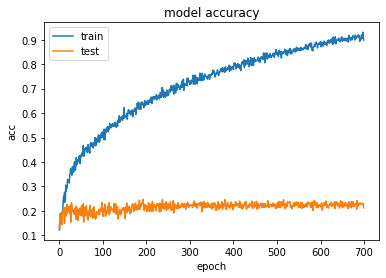

In [53]:
plt.plot(cnnhistory.history['accuracy'])
plt.plot(cnnhistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [55]:
train

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,emotion,gender
1,-653.169017,58.028073,-12.581209,11.818785,-7.681562,-0.617142,-8.337758,-5.823571,-6.547591,1.458057,...,2.558635,3.708506,2.790020,2.201920,-1.021457,0.819200,-0.277811,0.207586,neutral,female
3,-698.721214,47.088487,-11.333611,12.963090,-8.005652,-1.252229,-10.009068,-9.434125,-10.318875,-0.864674,...,-1.408215,0.958173,2.574661,1.877765,1.608618,0.222401,4.338524,4.266795,neutral,female
5,-739.440873,55.755429,-23.246592,13.280397,-3.838021,-5.957225,-12.653000,-6.214706,-10.689208,3.398455,...,4.206937,5.363243,4.332376,3.667531,1.550318,-0.558750,1.737009,3.253290,neutral,female
7,-692.393582,68.048347,3.857427,26.590947,2.598323,6.667670,1.640871,-4.939541,-1.004390,1.792656,...,2.985039,5.605745,5.896914,5.154771,4.143033,5.628289,4.912781,4.313900,neutral,female
9,-574.430922,56.297725,-3.995249,9.307219,0.660650,0.722855,-10.766332,-3.891049,-7.494775,1.972640,...,5.605457,3.372160,5.965045,2.542946,2.380176,1.891932,1.244445,3.589855,neutral,female
11,-686.793732,63.759015,-5.019265,14.655203,-2.392172,-0.812546,-5.175949,-6.032188,-13.602619,-1.257705,...,3.302091,4.932687,5.131727,3.666039,4.504458,1.554605,0.302437,-2.583656,neutral,female
13,-765.338586,47.169830,1.476838,15.077700,-10.482029,-1.461810,-8.149069,-4.225049,-7.926242,0.051971,...,-0.515905,0.504372,1.259402,2.089944,3.679059,2.809832,1.927483,1.177062,neutral,female
15,-663.830633,61.380003,2.275193,12.700737,-4.215593,-4.703434,-11.695962,-3.269569,-8.981364,-0.019918,...,0.044593,-0.209263,-0.497776,0.500730,1.943027,2.300725,2.240043,1.939023,neutral,female
17,-754.981614,59.807533,0.850680,15.180320,-4.610334,-0.571079,-6.452572,-9.619606,-11.002419,2.098613,...,-3.324028,-1.853533,-1.035654,0.965440,4.182645,7.387866,10.678265,10.405077,neutral,female
19,-719.650165,40.265067,-10.677992,12.497934,-10.565180,-2.727621,-11.100496,-7.746538,-8.434710,-1.384802,...,2.053068,2.236037,2.297235,3.286657,2.094471,1.377533,-1.344257,-1.004930,neutral,female


In [56]:
#save model
model_name = 'Gender_Model_ravdess.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at C:\Users\ioann\saved_models\Gender_Model_ravdess.h5 


In [57]:
import json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [63]:
#load
# loading json and creating model
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("saved_models/Gender_Model_ravdess.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(x_testcnn, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
accuracy: 21.25%


In [90]:
preds = loaded_model.predict(x_testcnn, 
                         batch_size=32, 
                         verbose=1)

720/720 [==============================] - 0s 229us/step


In [65]:
preds1=preds.argmax(axis=1)
preds1

array([6, 5, 6, 6, 6, 6, 6, 4, 6, 6, 6, 4, 6, 4, 6, 6, 6, 6, 6, 4, 6, 6,
       6, 4, 6, 6, 6, 6, 6, 6, 6, 4, 6, 6, 6, 4, 6, 6, 6, 6, 6, 6, 6, 4,
       6, 6, 6, 4, 6, 1, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 1, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 2, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 5, 5, 2, 6, 6, 6, 6, 6, 6, 6, 6, 6, 1, 5, 4,
       6, 6, 6, 6, 4, 6, 6, 6, 6, 5, 6, 6, 6, 1, 6, 6, 6, 1, 6, 6, 6, 5,
       6, 6, 6, 6, 6, 6, 6, 2, 6, 6, 6, 5, 6, 1, 6, 6, 1, 6, 4, 4, 1, 6,
       6, 4, 6, 1, 4, 6, 4, 6, 4, 4, 6, 1, 4, 4, 6, 4, 6, 2, 6, 6, 6, 4,
       6, 1, 4, 4, 6, 1, 5, 2, 6, 6, 6, 4, 6, 1, 6, 5, 1, 2, 1, 0, 1, 1,
       4, 4, 2, 6, 4, 4, 4, 0, 1, 3, 4, 2, 1, 4, 0, 2, 4, 4, 0, 0, 1, 0,
       4, 1, 1, 4, 3, 1, 4, 4, 0, 0, 1, 3, 6, 1, 1, 4, 2, 1, 4, 4, 6, 1,
       6, 5, 6, 6, 6, 4, 6, 6, 6, 4, 6, 1, 6, 6, 6, 6, 6, 4, 6, 6, 5, 4,
       5, 6, 6, 6, 6, 6, 6, 4, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 4, 6, 6,
       6, 6, 5, 4, 5, 4, 1, 6, 6, 4, 4, 6, 4, 6, 6,

In [112]:
abc = preds1.astype(int).flatten()
predictions = (lb.inverse_transform((abc)))

In [88]:
preddf = pd.DataFrame({'predictedvalues': predictions})
preddf[:10]

,predictedvalues
0,sad
1,neutral
2,sad
3,sad
4,sad
5,sad
6,sad
7,happy
8,sad
9,sad


In [115]:
actual=y_test.argmax(axis=1)
abc123 = actual.astype(int).flatten()
actualvalues = (lb.inverse_transform((abc123)))

In [69]:
actualdf = pd.DataFrame({'actualvalues': actualvalues})
actualdf[:10]

,actualvalues
0,neutral
1,neutral
2,neutral
3,neutral
4,neutral
5,neutral
6,neutral
7,neutral
8,neutral
9,neutral


In [70]:
finaldf = actualdf.join(preddf)

In [71]:
finaldf

,actualvalues,predictedvalues
0,neutral,sad
1,neutral,neutral
2,neutral,sad
3,neutral,sad
4,neutral,sad
5,neutral,sad
6,neutral,sad
7,neutral,happy
8,neutral,sad
9,neutral,sad


In [110]:
from sklearn.metrics import confusion_matrix
confusion_matrix(actualvalues, predictions)


array([[37,  6,  4,  1, 33,  1, 13,  1],
       [ 0,  5,  3,  0,  2, 12, 74,  0],
       [ 6, 12, 11,  1, 19, 12, 33,  2],
       [ 7, 10,  3, 11, 20,  8, 34,  3],
       [ 8, 22,  7,  3, 30,  2, 24,  0],
       [ 0,  0,  0,  0,  9,  1, 38,  0],
       [ 0, 10,  0,  0, 26,  8, 50,  2],
       [ 6,  7, 13,  1, 25, 18, 18,  8]], dtype=int64)

In [118]:
finaldf.groupby('actualvalues').count()

,predictedvalues
actualvalues,
angry,96
calm,96
disgusted,96
fearful,96
happy,96
neutral,48
sad,96
surprised,96


In [119]:
finaldf.groupby('predictedvalues').count()

,actualvalues
predictedvalues,
angry,64
calm,72
disgusted,41
fearful,17
happy,164
neutral,62
sad,284
surprised,16


In [120]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
        
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [121]:
from sklearn.metrics import accuracy_score
y_true = finaldf.actualvalues
y_pred = finaldf.predictedvalues
accuracy_score(y_true, y_pred)*100

21.25

In [123]:
from sklearn.metrics import f1_score
f1_score(y_true, y_pred, average='macro') *100

19.153301289517604

In [124]:
from sklearn.metrics import confusion_matrix
c = confusion_matrix(y_true, y_pred)
c

array([[37,  6,  4,  1, 33,  1, 13,  1],
       [ 0,  5,  3,  0,  2, 12, 74,  0],
       [ 6, 12, 11,  1, 19, 12, 33,  2],
       [ 7, 10,  3, 11, 20,  8, 34,  3],
       [ 8, 22,  7,  3, 30,  2, 24,  0],
       [ 0,  0,  0,  0,  9,  1, 38,  0],
       [ 0, 10,  0,  0, 26,  8, 50,  2],
       [ 6,  7, 13,  1, 25, 18, 18,  8]], dtype=int64)

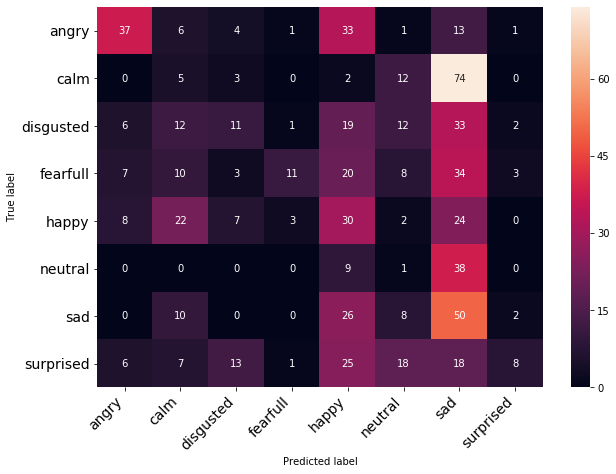

In [125]:
class_names = ['angry', 'calm', 'disgusted', 'fearfull', 'happy', 'neutral', 'sad', 'surprised']


print_confusion_matrix(c, class_names)